In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

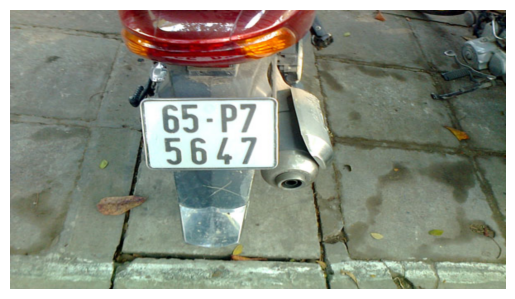

In [ ]:
img_path = r"D:\Xu_ly_anh\project\bien_so_xe\data_back\4.jpg"
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (1920,1080))

plt.imshow(img)
plt.axis('off')
plt.show()

In [64]:
def gray(img):
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

    H, S, V = cv.split(img_hsv)

    imgTopHat = np.zeros((1920, 1080, 1), np.uint8)
    imgBlackHat = np.zeros((1920, 1080, 1), np.uint8)
    kernel = np.ones((3, 3), np.uint8)

    imgTopHat = cv.morphologyEx(V, cv.MORPH_TOPHAT, kernel, iterations = 10)
    imgBlackHat = cv.morphologyEx(V, cv.MORPH_BLACKHAT, kernel, iterations = 10)

    img_gray = cv.add(V, imgTopHat)
    img_gray = cv.subtract(img_gray, imgBlackHat)
    return img_gray

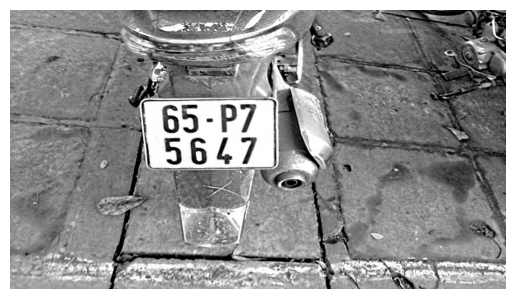

In [65]:
img_gray = gray(img)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

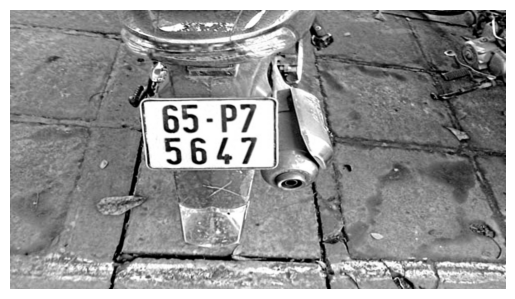

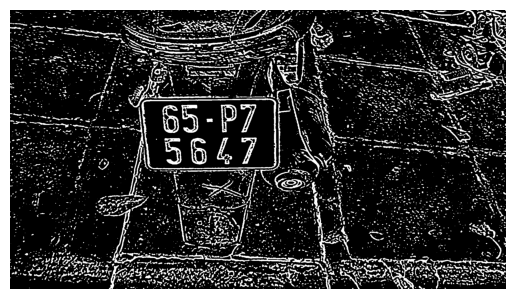

In [66]:
img_blur = cv.GaussianBlur(img_gray, (5, 5), 0)
img_threshhold = cv.adaptiveThreshold(img_blur, 255.0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 19, 9)

# plt.figure(figsize=(12, 8))
# plt.subplot(1, 2, 1)
plt.imshow(img_blur, cmap='gray')
plt.axis('off')
plt.show()

# plt.subplot(1, 2, 2)
plt.imshow(img_threshhold, cmap='gray')
plt.axis('off')
plt.show()

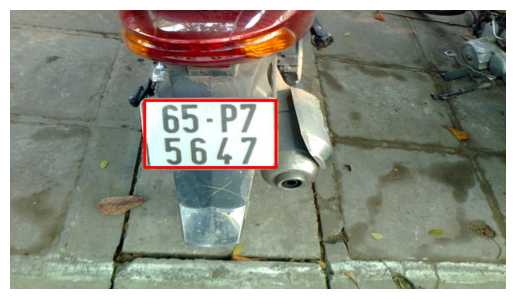

In [67]:
contours,_ = cv.findContours(img_threshhold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
new_img = img.copy()

ROI_list = []
for cnt in contours:
    peri = cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, 0.06 * peri, True)
    
    if (len(approx) != 4):
        continue
    
    x, y, w, h = cv.boundingRect(approx)

    aspect_ratio = w / h

    if not (300 <= w <= 800 and 200 < h):
        continue

    if not(1 < aspect_ratio < 2.5):
        continue

    cv.rectangle(new_img, (x, y), (x + w, y + h), (255, 0, 0), 10)
    
    roi = img[y : y + h, x : x + w]
    ROI_list.append(roi)

plt.imshow(new_img)
plt.axis('off')
plt.show()

In [ ]:
pallete = []
for roi_img in ROI_list:
    roi_img = cv.resize(roi_img, (600,200))
    gray_roi = gray(roi_img)

    kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
    roi_img = cv.morphologyEx(gray_roi, cv.MORPH_CLOSE, kernel)
    roi_img = cv.morphologyEx(roi_img, cv.MORPH_OPEN, kernel)
    roi_img = cv.morphologyEx(roi_img, cv.MORPH_GRADIENT, kernel)
    _, roi_img = cv.threshold(roi_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    valid_contours = []
    contours, _ = cv.findContours(roi_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    
    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)

        # # --- ĐIỀU KIỆN 1: kích thước height của kí tự và width luôn nhỏ hơn height ---
        if not(70 < h < 140 and 40 < w):
            continue

        # # --- ĐIỀU KIỆN 2: Tỉ lệ aspect ---
        # # Lưu ý: Nếu biển nghiêng, ký tự sẽ bị "mập" ra (w tăng) hoặc "lùn" đi (h giảm)
        if not (0.1 < w / float(h) < 1.2):
            continue

        # # --- ĐIỀU KIỆN 3: lọc diện tích thật ---
        if cv.contourArea(cnt) < 1000:
            continue

        # Nếu vượt qua tất cả các ải trên -> Thêm vào danh sách hợp lệ
        valid_contours.append(cnt)
        roi = roi_img[y:y+h, x:x+w]

    valid_contours = sorted(valid_contours, key=lambda c: (cv.boundingRect(c)[1] // 20, cv.boundingRect(c)[0]))

    for cnt in valid_contours:
        x, y, w, h = cv.boundingRect(cnt)
        roi = roi_img[y:y+h, x:x+w]
        pallete.append(roi)


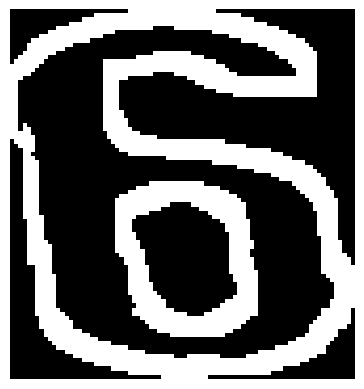

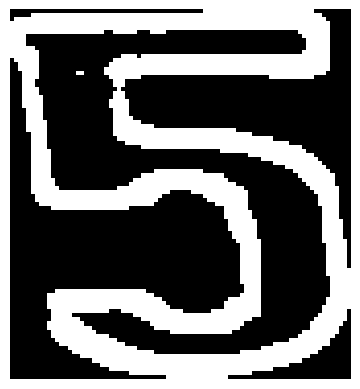

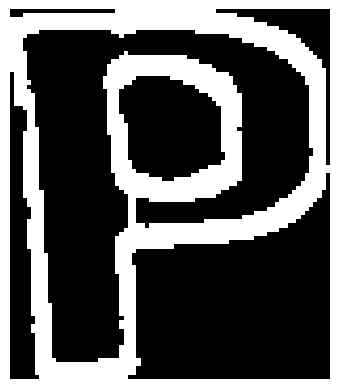

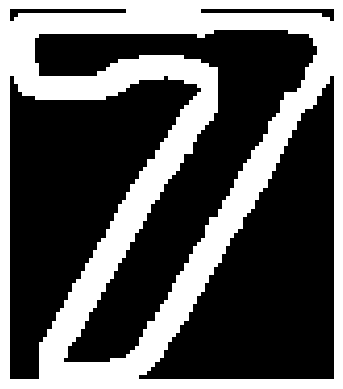

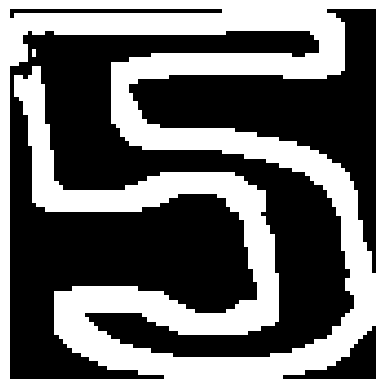

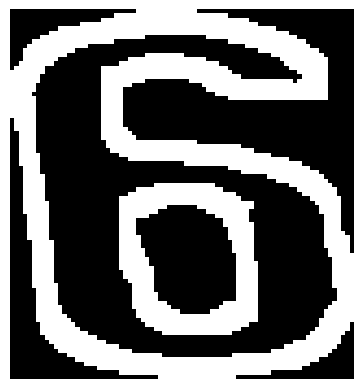

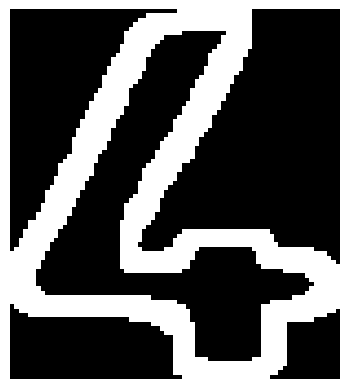

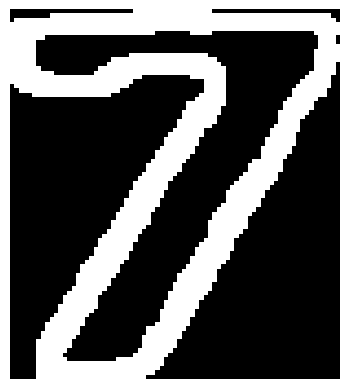

In [ ]:
for i, cnt in enumerate(pallete):
    # plt.subplot(2, 4, i + 1)
    plt.imshow(cnt,cmap='gray')
    plt.axis('off')
    plt.show()